In [67]:
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import random
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

A = get_truncated_normal(mean=0, sd=1, low=-4, upp=4)

class Associate:
    def __init__(self):
        self.skill_level = random.random() * 2 - 1 # Uniform skill level
        self.current_rating = 3
        self.num_projects_done = 0
        
    def set_new_rating(self, new_rating):
        self.current_rating = max(min(new_rating, 5), 1)
        

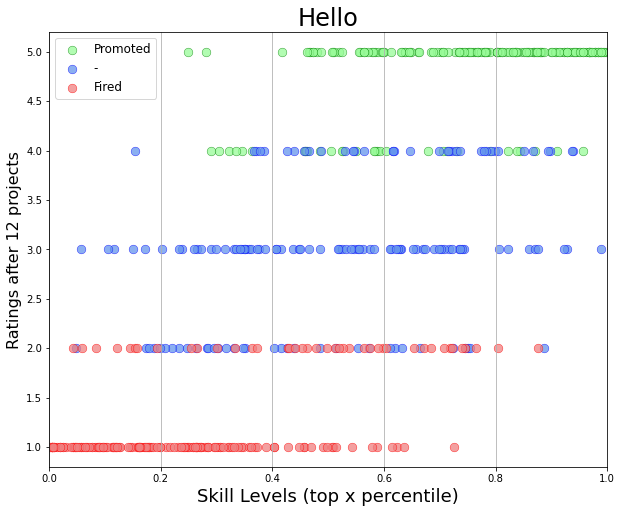

In [66]:
n_ASC = 500
n_Periods = 12

rating_share_skill = 0.2
rating_share_outcome = 0.8

truncated_normals = []
truncated_normals.append(get_truncated_normal(mean=-3, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=-1.5, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=0, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=1.5, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=3, sd=1, low=-4, upp=4))

associates = []

for i in range(n_ASC):
    asc = Associate()
    associates.append(asc)

for p in range(n_Periods):
    # Create an associate
    for i in range(n_ASC):
        share_of_luck = max(0.7 - (associates[i].num_projects_done * 0.1), 0.3)
        share_of_skill = 1.0 - share_of_luck
        
#         share_of_luck = 0.0
#         share_of_skill = 1.0
        
        random_project_outcome = truncated_normals[associates[i].current_rating-1].rvs()

        project_outcome = share_of_skill * associates[i].skill_level + share_of_luck * random_project_outcome
        project_rating_for_asc = round((project_outcome + 1) / 2 * 4 + 1)
        
        projs_done = associates[i].num_projects_done
        
        if projs_done == 0:
            new_asc_rating = project_rating_for_asc
        else: 
            new_asc_rating = round((associates[i].current_rating * 2 + project_rating_for_asc) / 3)
        
        associates[i].num_projects_done += 1

        associates[i].set_new_rating(new_rating=new_asc_rating)
        
end_ratings_promoted = []
skill_levels_promoted = []

end_ratings_kicked = []
skill_levels_kicked = []

end_ratings_normal = []
skill_levels_normal = []

for i in range(n_ASC):
    if associates[i].current_rating == 5:
        skill_levels_promoted.append((associates[i].skill_level + 1) / 2)
        end_ratings_promoted.append(associates[i].current_rating)
        
    if associates[i].current_rating == 4:
        if random.random() > 0.5:
            skill_levels_promoted.append((associates[i].skill_level + 1) / 2)
            end_ratings_promoted.append(associates[i].current_rating)
        else:
            skill_levels_normal.append((associates[i].skill_level + 1) / 2)
            end_ratings_normal.append(associates[i].current_rating)
            
    if associates[i].current_rating == 3:
        skill_levels_normal.append((associates[i].skill_level + 1) / 2)
        end_ratings_normal.append(associates[i].current_rating)
        
    if associates[i].current_rating == 2:
        if random.random() > 0.5:
            skill_levels_kicked.append((associates[i].skill_level + 1) / 2)
            end_ratings_kicked.append(associates[i].current_rating)
        else:
            skill_levels_normal.append((associates[i].skill_level + 1) / 2)
            end_ratings_normal.append(associates[i].current_rating)
            
    if associates[i].current_rating == 1:
        skill_levels_kicked.append((associates[i].skill_level + 1) / 2)
        end_ratings_kicked.append(associates[i].current_rating)

plt.rcParams["figure.figsize"] = (10,8)
# plt.grid(zorder=0)
plt.scatter(skill_levels_promoted, end_ratings_promoted, label="Promoted", marker="o", alpha=0.75, s=75, color="palegreen", edgecolor='green', linewidth=0.5, zorder=1)
plt.scatter(skill_levels_normal, end_ratings_normal, label="-", marker="o", alpha=0.75, s=75, color="cornflowerblue", edgecolor='blue', linewidth=0.5, zorder=1)
plt.scatter(skill_levels_kicked, end_ratings_kicked, label="Fired", marker="o", alpha=0.75, s=75, color="lightcoral", edgecolor='red', linewidth=0.5, zorder=1)

# Red Color = Kicked
# Green Color = Promoted

plt.xlabel("Skill Levels (top x percentile)", fontsize=18)
plt.ylabel("Ratings after 12 projects", fontsize=16)
plt.legend(fontsize=12)
plt.title("Hello", fontsize=24)

plt.grid(axis='x')
plt.xlim(0, 1)
plt.show()
    

In [85]:
n_ASC = 500
n_Periods = 12

rating_share_skill = 0.2
rating_share_outcome = 0.8

truncated_normals = []
truncated_normals.append(get_truncated_normal(mean=-3, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=-1.5, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=0, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=1.5, sd=1, low=-4, upp=4))
truncated_normals.append(get_truncated_normal(mean=3, sd=1, low=-4, upp=4))




def testtest(luck_max, luck_min, luck_less_per_project):
    associates = []
    
    for i in range(n_ASC):
        asc = Associate()
        associates.append(asc)

    for p in range(n_Periods):
        # Create an associate
        for i in range(n_ASC):
            share_of_luck = max(luck_max - (associates[i].num_projects_done * luck_less_per_project), luck_min)
            share_of_skill = 1.0 - share_of_luck

    #         share_of_luck = 0.0
    #         share_of_skill = 1.0

            random_project_outcome = truncated_normals[associates[i].current_rating-1].rvs()

            project_outcome = share_of_skill * associates[i].skill_level + share_of_luck * random_project_outcome
            project_rating_for_asc = round((project_outcome + 1) / 2 * 4 + 1)

            projs_done = associates[i].num_projects_done

            if projs_done == 0:
                new_asc_rating = project_rating_for_asc
            else: 
                new_asc_rating = round((associates[i].current_rating * 2 + project_rating_for_asc) / 3)

            associates[i].num_projects_done += 1

            associates[i].set_new_rating(new_rating=new_asc_rating)

    end_ratings_promoted = []
    skill_levels_promoted = []

    end_ratings_kicked = []
    skill_levels_kicked = []

    end_ratings_normal = []
    skill_levels_normal = []

    for i in range(n_ASC):
        if associates[i].current_rating == 5:
            skill_levels_promoted.append((associates[i].skill_level + 1) / 2)
            end_ratings_promoted.append(associates[i].current_rating)

        if associates[i].current_rating == 4:
            if random.random() > 0.5:
                skill_levels_promoted.append((associates[i].skill_level + 1) / 2)
                end_ratings_promoted.append(associates[i].current_rating)
            else:
                skill_levels_normal.append((associates[i].skill_level + 1) / 2)
                end_ratings_normal.append(associates[i].current_rating)

        if associates[i].current_rating == 3:
            skill_levels_normal.append((associates[i].skill_level + 1) / 2)
            end_ratings_normal.append(associates[i].current_rating)

        if associates[i].current_rating == 2:
            if random.random() > 0.5:
                skill_levels_kicked.append((associates[i].skill_level + 1) / 2)
                end_ratings_kicked.append(associates[i].current_rating)
            else:
                skill_levels_normal.append((associates[i].skill_level + 1) / 2)
                end_ratings_normal.append(associates[i].current_rating)

        if associates[i].current_rating == 1:
            skill_levels_kicked.append((associates[i].skill_level + 1) / 2)
            end_ratings_kicked.append(associates[i].current_rating)

    plt.rcParams["figure.figsize"] = (14,8)
    # plt.grid(zorder=0)
    plt.scatter(skill_levels_promoted, end_ratings_promoted, label="Promoted", marker="o", alpha=1.0, s=150, color="palegreen", edgecolor='green', linewidth=1, zorder=1)
    plt.scatter(skill_levels_kicked, end_ratings_kicked, label="Fired", marker="o", alpha=1.0, s=150, color="lightcoral", edgecolor='red', linewidth=1, zorder=1)
    plt.scatter(skill_levels_normal, end_ratings_normal, label="-", marker="o", alpha=0.5, s=150, color="cornflowerblue", edgecolor='blue', linewidth=1, zorder=1)
    

    # Red Color = Kicked
    # Green Color = Promoted

    plt.xlabel("Skill Levels (top x percentile)", fontsize=18)
    plt.ylabel("Ratings after 12 projects", fontsize=16)
    plt.legend(fontsize=14)
    plt.title("Path dependent rating after 12 projects (n=500)", fontsize=20)

    plt.grid(axis='x')
    plt.xlim(0, 1)
    plt.show()
    
interact(testtest, luck_max=(0,1,0.01), luck_min=(0,1,0.01), luck_less_per_project=(0,1,0.01));

interactive(children=(FloatSlider(value=0.0, description='luck_max', max=1.0, step=0.01), FloatSlider(value=0.…

In [ ]:
# Generate a normally distributed skill-level with minimum 0 and maximum 100
numbers = []

X = get_truncated_normal(mean=0, sd=1, low=-4, upp=4)
numbers = X.rvs(50000)

_ = plt.hist(numbers, bins=100)  
plt.show()




X = get_truncated_normal(mean=-2, sd=1, low=-4, upp=4)
numbers = X.rvs(50000) / 4

_ = plt.hist(numbers, bins=100)  
plt.show()

# for i in range(0, 50000):
#    numbers.append(get_truncated_normal(mean=-1, sd=1, low=-2, upp=10))

  